In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk/credit_risk_dataset.csv


In [4]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install matplotlib seaborn  missingno plotly wordcloud


In [6]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '00000000'

import os


import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
data_original = pd.read_csv ("/kaggle/input/credit-risk/credit_risk_dataset.csv")
data = data_original

# data.head()
data.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': '#daefdd','color':'black','border-color':'#8b8c8c'})

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,40,32400,RENT,nan,HOMEIMPROVEMENT,A,6000,7.900000,1,0.190000,N,15
1,22,52000,RENT,3.000000,PERSONAL,C,12000,13.570000,0,0.230000,Y,2
2,23,60000,MORTGAGE,0.000000,MEDICAL,B,15000,10.370000,0,0.250000,N,4
3,37,75000,RENT,3.000000,HOMEIMPROVEMENT,C,10000,nan,0,0.130000,Y,17
4,22,60000,MORTGAGE,1.000000,MEDICAL,A,10000,7.900000,0,0.170000,N,4
5,23,21000,RENT,3.000000,DEBTCONSOLIDATION,D,3750,15.650000,1,0.180000,N,2


In [8]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [9]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [13]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [14]:
data.loan_status.head() #getting diff output

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [15]:
data.duplicated().sum()

165

In [16]:
numeric_data=data.select_dtypes(include=['int64'])
correlation_matrix=numeric_data.corr()
print(correlation_matrix)

                            person_age  person_income  loan_amnt  loan_status  \
person_age                    1.000000       0.173202   0.050787    -0.021629   
person_income                 0.173202       1.000000   0.266820    -0.144449   
loan_amnt                     0.050787       0.266820   1.000000     0.105376   
loan_status                  -0.021629      -0.144449   0.105376     1.000000   
cb_person_cred_hist_length    0.859133       0.117987   0.041967    -0.015529   

                            cb_person_cred_hist_length  
person_age                                    0.859133  
person_income                                 0.117987  
loan_amnt                                     0.041967  
loan_status                                  -0.015529  
cb_person_cred_hist_length                    1.000000  


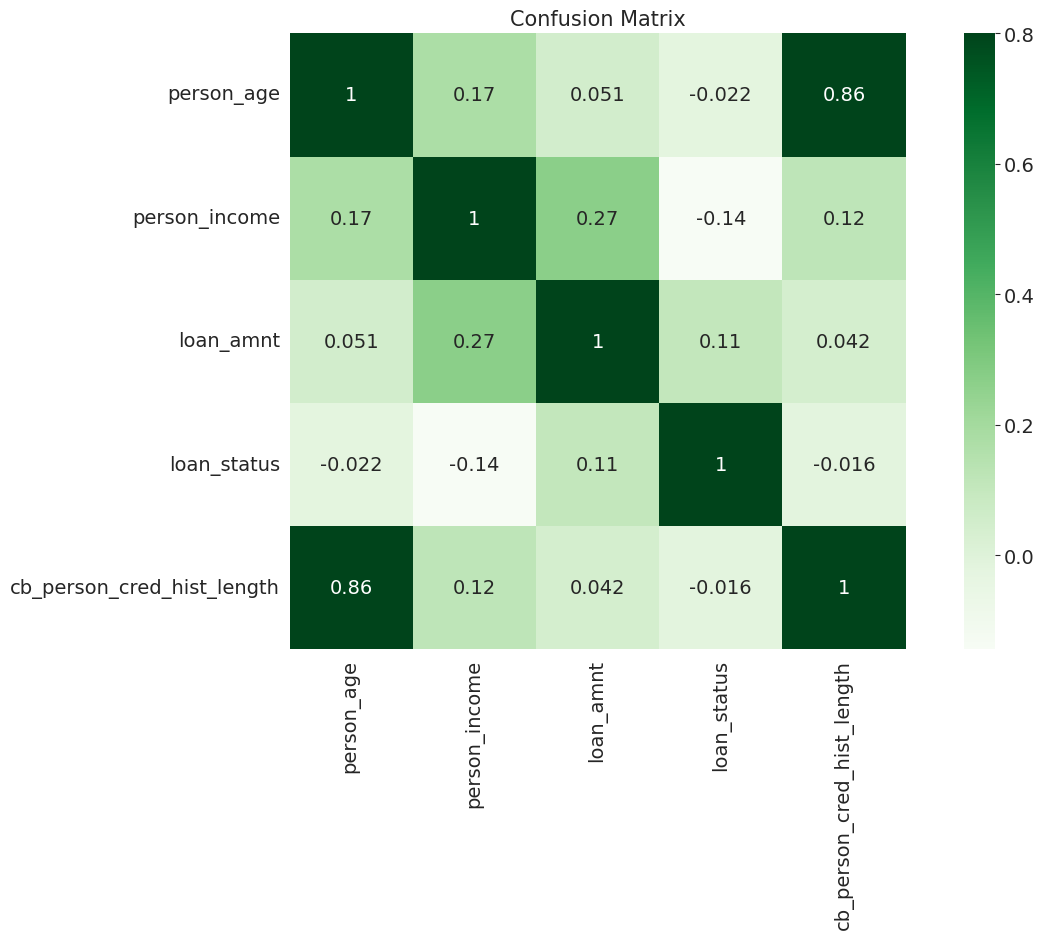

In [17]:


fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
sns.heatmap(correlation_matrix, vmax =.8, square = True, annot = True,cmap='Greens' )
plt.title('Confusion Matrix',fontsize=15);



In [18]:
from IPython.core.display import HTML

def multi_table(table_list):
    return HTML('<table><tr style="background-color:#ddefdd;">' + ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) + '</tr></table>')

In [19]:
nunique_df={var:pd.DataFrame(data[var].value_counts())
           for var in {'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'}}

multi_table([nunique_df['person_age'],nunique_df['person_income'],nunique_df['person_home_ownership'],nunique_df['person_emp_length'],nunique_df['loan_intent'],nunique_df['loan_grade'],nunique_df['loan_amnt'],nunique_df['loan_int_rate'],nunique_df['loan_status'],nunique_df['loan_percent_income'],nunique_df['cb_person_default_on_file'],nunique_df['cb_person_cred_hist_length']])

,count
person_age,
23,3889
22,3633
24,3549
25,3037
26,2477
27,2138
28,1854
29,1687
30,1316


In [20]:
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"mimimum Age {min_}")

def age_group(arr):
    lenarr = len(arr)
    for i in range(0, lenarr-1):
        next =arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Numbre of people {num_people}')
        
age_group([0, 18, 26 , 36, 46, 56, 66])        

maximum Age 144
mimimum Age 20
Age between 1 and 18: Numbre of people 0
Age between 19 and 26: Numbre of people 17829
Age between 27 and 36: Numbre of people 11834
Age between 37 and 46: Numbre of people 2360
Age between 47 and 56: Numbre of people 434
Age between 57 and 66: Numbre of people 98


In [21]:
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0, lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])        

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 9489
Loan Amount between 5001 and 10000: Number of people 12040
Loan Amount between 10001 and 15000: Number of people 6123
Loan Amount between 15001 and inf: Number of people 4929


In [22]:
level_counts=data.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values, names=level_counts.index, color_discrete_sequence=px.colors.sequential.Mint, title= 'person_home_ownership')

fig.update_traces(textinfo='label+percent+value', textfont_size=13, marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color= 'gray'
fig.show()

In [23]:
level_counts=data.loan_grade.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'loan_grade'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

In [24]:
fig=px.histogram(data, x= 'loan_intent',histnorm = 'percent', text_auto = '.2f', template = 'presentation', title = 'loan intent', color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

In [25]:
fig=px.histogram(data, x = 'cb_person_cred_hist_length', text_auto = '.2f', template = 'presentation', title = 'person credit history length', color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

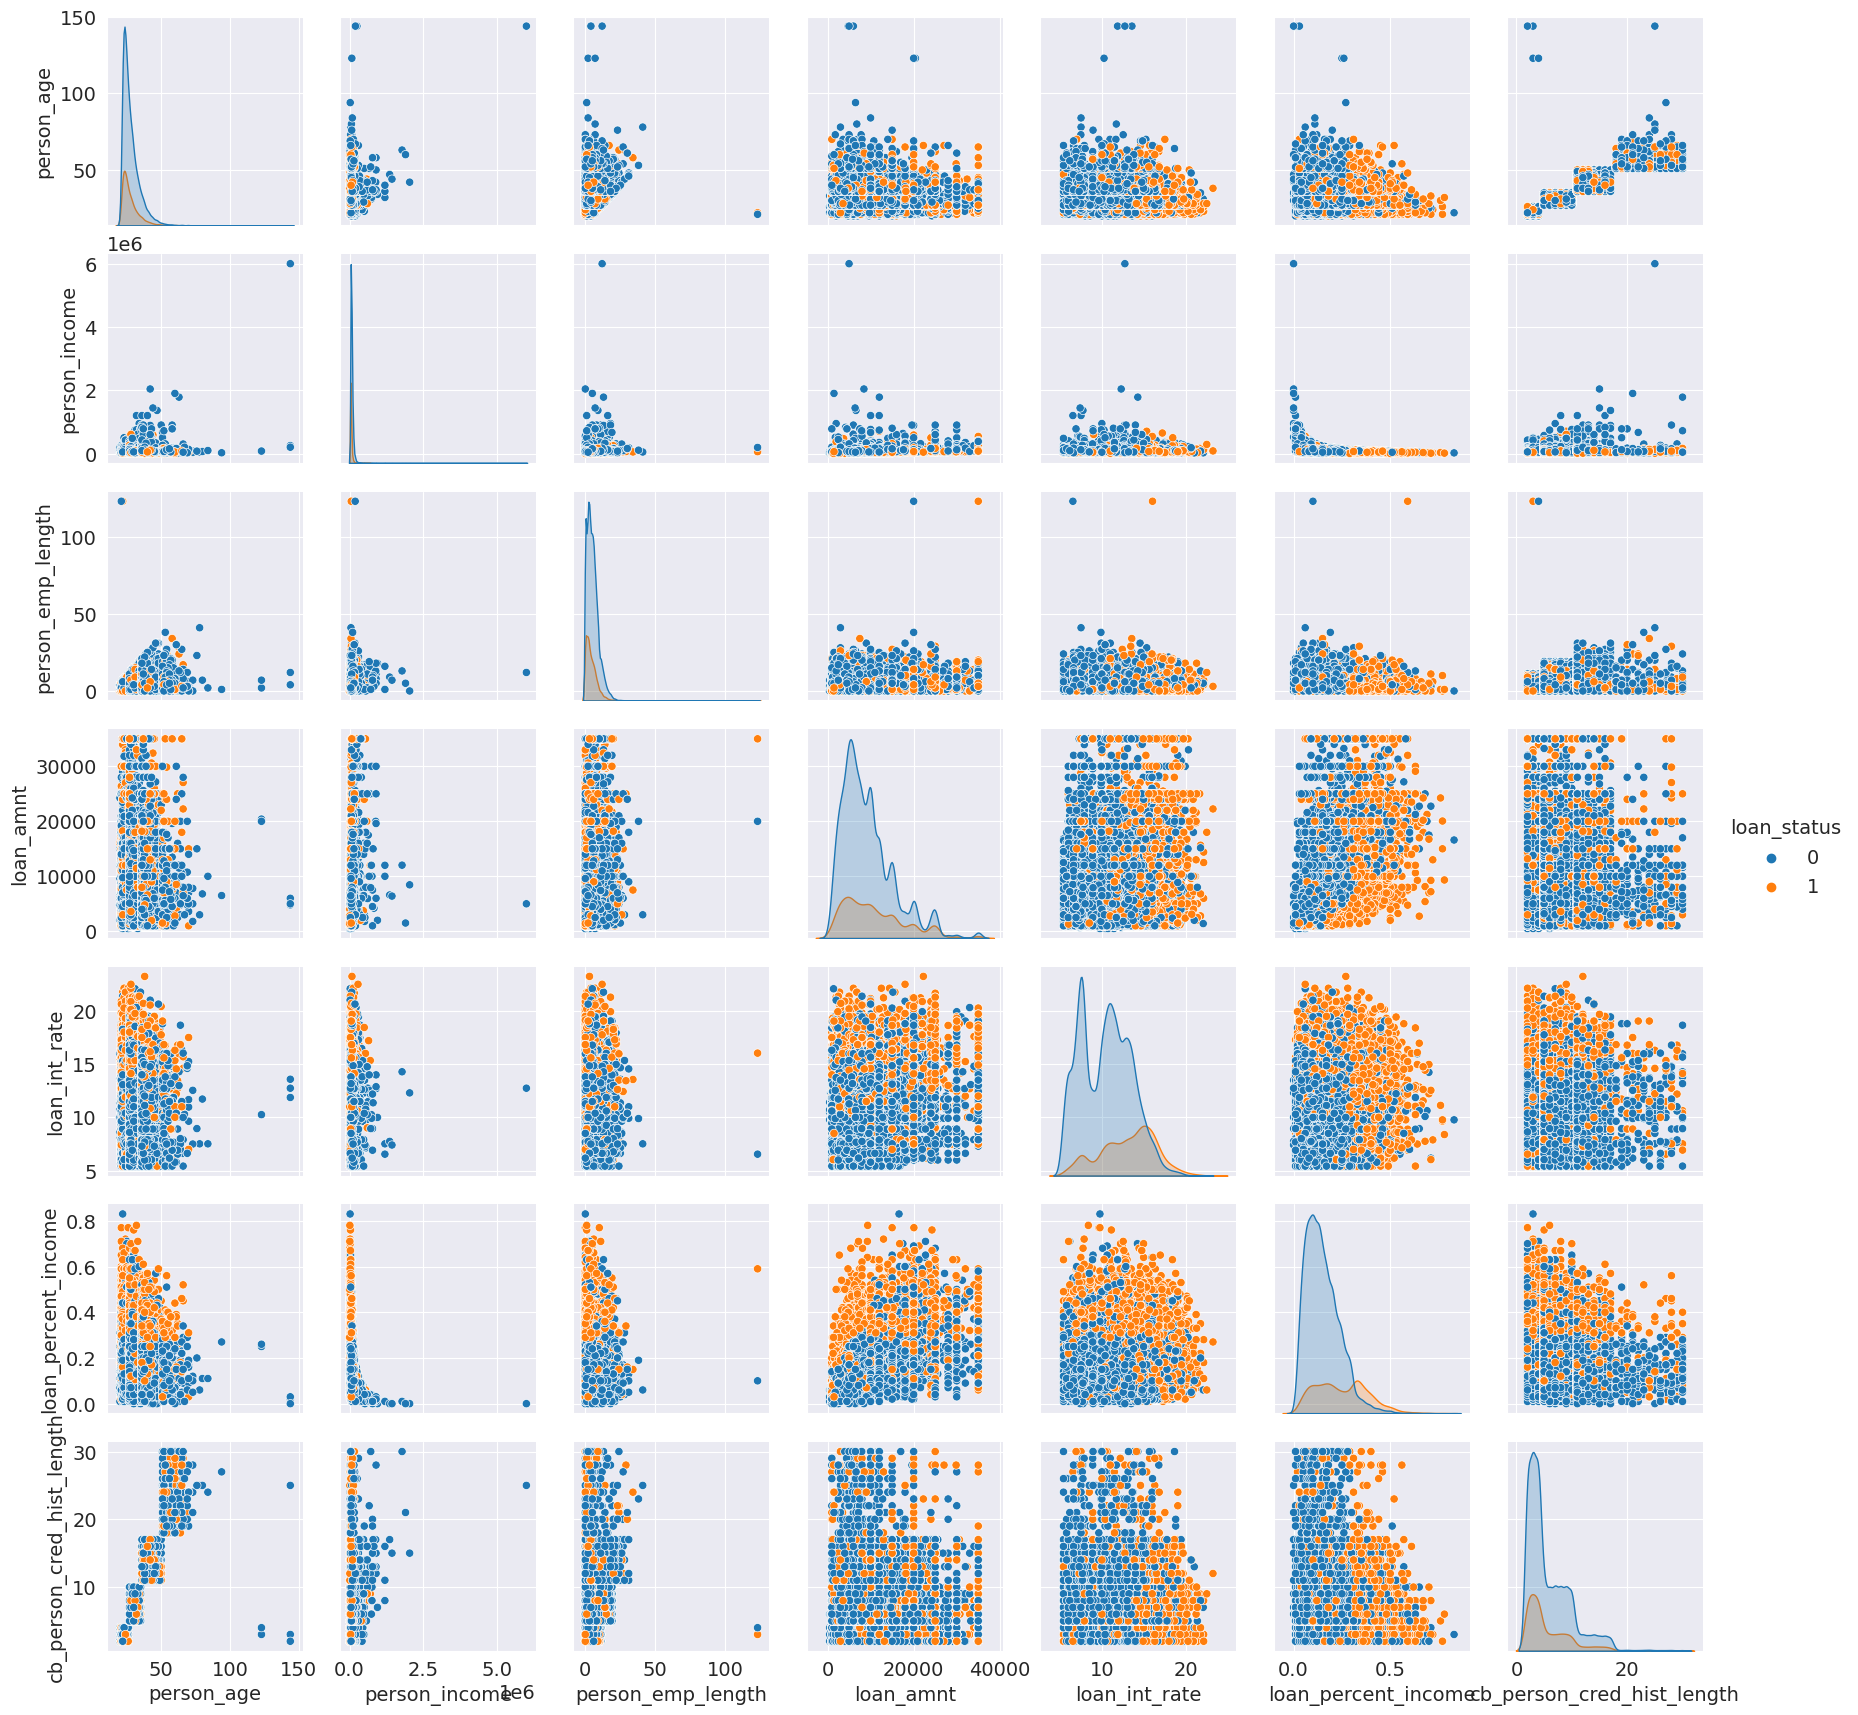

In [26]:
sns.pairplot(data,hue="loan_status")

In [27]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [28]:
data.dropna(axis=0, inplace=True)

In [29]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [30]:
data['loan_status'].value_counts()

loan_status
0    22435
1     6203
Name: count, dtype: int64

In [31]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [32]:
data.reset_index(inplace = True)

<BarContainer object of 57 artists>

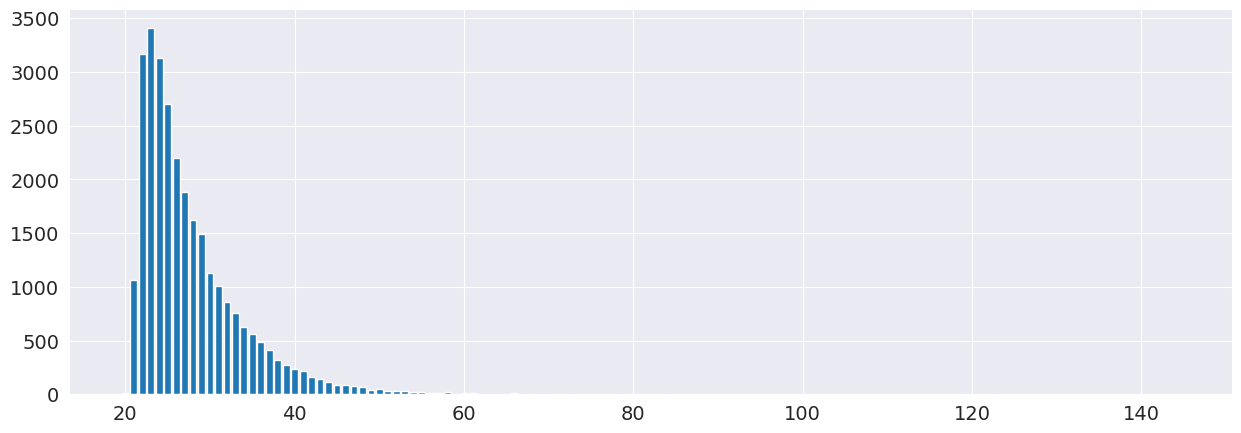

In [33]:
import matplotlib.pyplot as plt
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)

In [34]:
(data['person_age'].value_counts().values>90).sum()

25

In [35]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)

In [36]:
data['age_group'] = pd.cut(data['person_age'], bins=[20, 26, 36, 46, 56, 66], labels=['20-25','26-35', '36-45', '46-55', '56-65'])

In [37]:
data['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True, categories_dtype=object)

In [38]:
data.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25


In [39]:
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

data['loan_to_emp_length_ratio'] = data['person_emp_length'] / data['loan_amnt']

data['int_rate_to_emp_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [40]:
data.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_emp_amt_ratio'],
      dtype='object')

In [41]:
raw_data = data.copy()

In [42]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','age_group']
le_colums = []

In [43]:
# data = data.drop(drop_colums, axis=1)
data.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_emp_amt_ratio
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25,0.593220,0.003514,0.000458
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,0.104167,0.005000,0.011140
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,0.572917,0.000182,0.002340
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,0.534351,0.000114,0.000435
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,0.643382,0.000229,0.000408


In [44]:
data.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_emp_amt_ratio'],
      dtype='object')

In [45]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=12)

In [47]:
print(x_train.shape, x_test.shape)

(22906, 16) (5727, 16)


In [48]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace =True)

In [49]:
x_train.columns

Index(['level_0', 'index', 'person_age', 'person_income',
       'person_home_ownership', 'person_emp_length', 'loan_intent',
       'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_emp_amt_ratio'],
      dtype='object')

In [50]:
data.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_emp_amt_ratio
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25,0.593220,0.003514,0.000458
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,0.104167,0.005000,0.011140
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,0.572917,0.000182,0.002340
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,0.534351,0.000114,0.000435
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,0.643382,0.000229,0.000408


In [51]:
print(ohe_colums)

['cb_person_default_on_file', 'loan_grade', 'person_home_ownership', 'loan_intent', 'age_group']


In [52]:


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums])



OneHotEncoder()

In [53]:
ohe.categories_

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object)]

In [54]:
merge_ohe_col = np.concatenate((ohe.categories_[0], 
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
               ))

In [55]:
merge_ohe_col

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', '20-25', '26-35', '36-45',
       '46-55', '56-65', nan], dtype=object)

In [56]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray (), columns=merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(), columns=merge_ohe_col)

In [57]:
X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(ohe_colums, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_colums, axis=1)

In [58]:
X_new.head()
X_new.shape

(22906, 37)

In [59]:
X_new_test.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_emp_amt_ratio
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,29,60000,11.0,6000,15.27,0.10,10,0.100000,0.001833,0.002545
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,25,153000,9.0,7500,11.71,0.05,3,0.049020,0.001200,0.001561
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27,28000,8.0,12000,7.51,0.43,9,0.428571,0.000667,0.000626
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22,60000,3.0,18000,16.32,0.30,4,0.300000,0.000167,0.000907
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,25,135000,9.0,25000,16.07,0.19,4,0.185185,0.000360,0.000643


In [60]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

uniform_col= []

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       ]

bimodal_col = []


scaler_uniform = MinMaxScaler()
#X_new.loc[:,uniform_col] = scaler_uniform.fit_transform(X_new.loc[:,uniform_col])
#X_new_test.loc[:,uniform_col] = scaler_uniform.transform(X_new_test.loc[:,uniform_col])

scaler_normal = StandardScaler()
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler_normal.transform(X_new_test.loc[:,normal_col])

scaler_bimodal = RobustScaler()
#X_new.loc[:,bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:,bimodal_col])
#X_new_test.loc[:,bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:,bimodal_col])

In [61]:
X_new_test.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_emp_amt_ratio
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.211104,-0.126565,1.483186,-0.582184,1.310249,-0.655610,1.040588,0.100000,0.998412,0.002545
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.435771,1.705520,1.005928,-0.345592,0.207646,-1.123786,-0.688069,0.049020,0.407760,0.001561
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.112333,-0.756960,0.767299,0.364185,-1.093178,2.434352,0.793637,0.428571,-0.089631,0.000626
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.920928,-0.126565,-0.425847,1.310553,1.635455,1.217094,-0.441118,0.300000,-0.555935,0.000907
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.435771,1.350923,1.005928,2.414650,1.558025,0.187107,-0.441118,0.185185,-0.375631,0.000643


In [62]:
!pip install lightgbm

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

In [64]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier
lrc = LogisticRegression()
rfc = RandomForestClassifier
abc = AdaBoostClassifier
bc = BaggingClassifier
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier (verbose=0)
lgb = LGBMClassifier()
# print(lgb)



In [65]:
clf = {
    
        'KN': knc,
    'xgb': xgb,
    'cat': cat,
    'lgb': lgb
    
   
}

In [66]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf,X_train, y_train, X_test,y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred). ravel() 
    specifity = tn / (tn+fp)
    
    return accuracy, precision, recall, specifity

In [67]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

In [68]:
clf = {
    'KN' : knc, 
    'xgb':xgb,
    'cat':cat
#     'lgb':lgb
}

In [69]:
print(clf)

{'KN': KNeighborsClassifier(), 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'cat': <catboost.core.CatBoostClassifier object at 0x784547e147f0>}


In [70]:


accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name,clf in clf.items():
    
    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)
    



For  KN
Accuracy -  0.7819102496944299
Precision -  0.47957371225577267
Recall -  0.22022838499184338
Specificity -  0.9349033548100422

For  xgb
Accuracy -  0.9388859786973983
Precision -  0.9610526315789474
Recall -  0.7446982055464927
Specificity -  0.9917796045323262

For  cat
Accuracy -  0.9383621442290903
Precision -  0.9718918918918918
Recall -  0.733278955954323
Specificity -  0.9942235058875806



In [71]:
def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {'objective' : 'binary'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree
    
    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm), X_new, y_train, scoring = 'recall', cv=10).mean()
    return scores

params_lgbm = {
    'num_leaves': (0.5, 0.9),
    'max_depth' : (3, 15),
    'learning_rate' : (0.005, 0.3),
    'min_child_weight' : (1e-6, 1e-1),
    'subsample' : (0.5, 1),
    'colsample_bytree' : (0.5, 1)
    
}


lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.7257    | 0.6779    | 0.07837   | 5.824     | 0.04068   | 0.7332    | 0.8726    |
| 2         | 0.7332    | 0.6016    | 0.07873   | 8.376     | 0.00629   | 0.8758    | 0.7255    |
| 3         | 0.7452    | 0.7878    | 0.09183   | 10.37     | 0.07018   | 0.8778    | 0.6314    |
| 4         | 0.7404    | 0.9819    | 0.2788    | 3.86      | 0.05121   | 0.8182    | 0.5251    |
| 5         | 0.7663    | 0.716     | 0.2483    | 12.05     | 0.02145   | 0.8152    | 0.782     |
| 6         | 0.7627    | 0.6999    | 0.3       | 13.74     | 1e-06     | 0.7711    | 0.8697    |
| 7         | 0.6106    | 1.0       | 0.005     | 12.78     | 0.1       | 0.5       | 0.5       |
| 8         | 0.7547    | 0.6587    | 0.1249    | 10.37     | 0.006771  | 0.852     | 0.7247    |
| 9         | 0.7677

In [72]:
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm

{'colsample_bytree': 0.8312432615947036,
 'learning_rate': 0.3,
 'max_depth': 9,
 'min_child_weight': 0.04691913240249659,
 'num_leaves': 421,
 'subsample': 0.7694064792791018}

In [78]:
from  sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

knn = KNeighborsClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier()

ensemble = VotingClassifier(estimators=[('knn', knn), ('cat', cat), ('lgb', lgb)], voting='soft', verbose=0)
current_accuracy, current_precision, current_recall, current_specificity = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)

print("For ensemble")
print("Accuracy - ", current_accuracy)
print("Precision - ", current_precision)
print("Recall - ", current_recall)
print("Specificity -", current_specificity)

For ensemble
Accuracy -  0.9327745765671381
Precision -  0.9872537659327926
Recall -  0.6949429037520392
Specificity - 0.9975560986447456


In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
from sklearn.feature_selection import RFE

clf = RandomForestRegressor()

clf.fit(X_new, y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_new.columns).sort_values(ascending=False)
feature_scores

loan_to_income_ratio          0.238313
loan_int_rate                 0.158138
RENT                          0.126011
person_income                 0.094969
person_emp_length             0.037408
MEDICAL                       0.034325
int_rate_to_emp_amt_ratio     0.031486
loan_to_emp_length_ratio      0.029824
DEBTCONSOLIDATION             0.029523
person_age                    0.026369
index                         0.025935
level_0                       0.025381
C                             0.024232
loan_percent_income           0.019402
D                             0.017149
cb_person_cred_hist_length    0.014691
loan_amnt                     0.014608
HOMEIMPROVEMENT               0.011586
OWN                           0.010136
MORTGAGE                      0.004432
EDUCATION                     0.004052
PERSONAL                      0.003908
VENTURE                       0.003187
G                             0.002481
Y                             0.001876
N                        